In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it
from itertools import combinations

from sklearn.preprocessing import StandardScaler
import torch

## Load the Data

In [3]:
# File paths
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_3/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_3/initial_outputs.npy"

# Load the data
inputs = np.load(input_file_path)
outputs = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(inputs, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df['Output'] = outputs

df

,Input_1,Input_2,Input_3,Output
0,0.171525,0.343917,0.248737,-0.112122
1,0.242114,0.644074,0.272433,-0.087963
2,0.534906,0.398501,0.173389,-0.111415
3,0.492581,0.611593,0.340176,-0.034835
4,0.134622,0.219917,0.458206,-0.048008
5,0.345523,0.941360,0.269363,-0.110621
6,0.151837,0.439991,0.990882,-0.398926
7,0.645503,0.397143,0.919771,-0.113869
8,0.746912,0.284196,0.226300,-0.131461
9,0.170477,0.697032,0.149169,-0.094190


In [4]:
#Adicion de datos conforme el concurso ha avanzado

#Datos pre-competencia que aparecieron
new_data_0=pd.DataFrame([{'Input_1':0.111111,'Input_2':0.111111,'Input_3':0.111111,'Output':-0.1090975}]) 
df=pd.concat([df,new_data_0],ignore_index=True)

# Updated data with AVERAGE Outputs

df.loc[len(df)]=[0.85,0.05,0.681579,-0.192107222213204]
df.loc[len(df)]=[0.52,0.95,0.95,-0.242344981396556]
df.loc[len(df)]=[0.9,0.9,0.1,-0.0785088559649485]
df.loc[len(df)]=[0.01,0.5,0.732105,-0.123414877234934]
df.loc[len(df)]=[0.9,0.9,0.9,-0.100537252803029]
df.loc[len(df)]=[0.01,0.99,0.99,-0.431045043231239]
df.loc[len(df)]=[0.98,0.98,0.02,-0.0978662622553947]
df.loc[len(df)]=[0.473684,0.68421,0.210527,-0.127739009498983]
df.loc[len(df)]=[0.473684,0.473684,0.473684,-0.0107507274979407]
df.loc[len(df)]=[1.00000e-06,2.92930e-01,4.74748e-01,-0.0233886058411969]
df.loc[len(df)]=[0.717171,0.575757,0.575757,-0.0415179207548015]
df.loc[len(df)]=[1.00000e-06,3.13132e-01,4.74748e-01,-0.0191829270133972]
df.loc[len(df)]=[0.999999,0.545454,0.797979,-0.0664144539583228]
df.loc[len(df)]=[0.05,0.05,0.505051,-0.0852191509201375]
df.loc[len(df)]=[1.00000e-06,9.99999e-01,1.00000e-06,-0.158037814698779]
df.loc[len(df)]=[6.30872e-01,8.99328e-01,1.00000e-06,-0.135676137726301]
df.loc[len(df)]=[6.64429e-01,7.65100e-01,1.00000e-06,-0.11599477832269]
df.loc[len(df)]=[0.436884,0.453066,0.442615,-0.0115326612835186]
df.loc[len(df)]=[0.742412,0.625096,0.423735,-0.0101811750848587]
df.loc[len(df)]=[0.590604,0.52349,0.469799,-0.000380384333290447]
df.loc[len(df)]=[0.516778,0.623154,0.536174,-0.0260106694786459]
df.loc[len(df)]=[0.597315,0.524497,0.462349,-0.00814006019787721]
df.loc[len(df)]=[0.596638,0.641596,0.454538,-0.00549699074924734]
df.loc[len(df)]=[0.899159,0.656722,0.48395 ,-0.0136948298051575]

# ***************************************


#Print
df

,Input_1,Input_2,Input_3,Output
0,0.171525,0.343917,0.248737,-0.112122
1,0.242114,0.644074,0.272433,-0.087963
2,0.534906,0.398501,0.173389,-0.111415
3,0.492581,0.611593,0.340176,-0.034835
4,0.134622,0.219917,0.458206,-0.048008
5,0.345523,0.941360,0.269363,-0.110621
6,0.151837,0.439991,0.990882,-0.398926
7,0.645503,0.397143,0.919771,-0.113869
8,0.746912,0.284196,0.226300,-0.131461
9,0.170477,0.697032,0.149169,-0.094190


In [5]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

Basic Statistical Summary:
         Input_1    Input_2    Input_3     Output
count  40.000000  40.000000  40.000000  40.000000
mean    0.470155   0.569837   0.432807  -0.096045
std     0.320131   0.267817   0.289470   0.092386
min     0.000001   0.050000   0.000001  -0.431045
25%     0.165817   0.383836   0.222357  -0.116508
50%     0.518389   0.593675   0.456372  -0.091076
75%     0.678803   0.735127   0.569061  -0.032629
max     0.999999   0.999999   0.990882  -0.000380


In [6]:
# File paths SEGUNDO SET
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_3/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_3/initial_outputs.npy"

# Load the data
inputs2 = np.load(input_file_path)
outputs2 = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df2 = pd.DataFrame(inputs2, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df2['Output'] = outputs2

df2

,Input_1,Input_2,Input_3,Output
0,0.165700,0.256856,0.654690,-0.128094
1,0.650996,0.424173,0.526744,-0.031039
2,0.106013,0.243332,0.650257,-0.117276
3,0.352164,0.105808,0.065468,-0.079444
4,0.829086,0.439369,0.207134,-0.142586
5,0.804893,0.312070,0.243714,-0.119621
6,0.462041,0.129396,0.838586,-0.061199
7,0.822171,0.466507,0.549292,-0.034359
8,0.985148,0.720883,0.776440,-0.087697
9,0.186743,0.606741,0.669580,-0.115022


In [7]:
df = pd.concat([df, df2], ignore_index=True)
df


,Input_1,Input_2,Input_3,Output
0,0.171525,0.343917,0.248737,-0.112122
1,0.242114,0.644074,0.272433,-0.087963
2,0.534906,0.398501,0.173389,-0.111415
3,0.492581,0.611593,0.340176,-0.034835
4,0.134622,0.219917,0.458206,-0.048008
5,0.345523,0.941360,0.269363,-0.110621
6,0.151837,0.439991,0.990882,-0.398926
7,0.645503,0.397143,0.919771,-0.113869
8,0.746912,0.284196,0.226300,-0.131461
9,0.170477,0.697032,0.149169,-0.094190


## Function 3: Drug Discovery Problem
#### In this example, you are doing drug discovery! You can select three compounds to create a drug, and receive a measurement of the people’s adverse reaction to the drug. You want to make this as close as possible to zero. (hint: one of the variables may not cause any effects on the person).

In [9]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Basic Statistical Summary:
         Input_1    Input_2    Input_3     Output
count  55.000000  55.000000  55.000000  55.000000
mean    0.485461   0.524437   0.471680  -0.093446
std     0.315493   0.266820   0.287759   0.080773
min     0.000001   0.050000   0.000001  -0.431045
25%     0.171001   0.304947   0.245005  -0.116635
50%     0.520000   0.523490   0.473684  -0.087963
75%     0.729791   0.700003   0.675580  -0.035607
max     0.999999   0.999999   0.990882  -0.000380

Missing values in the dataset:
Input_1    0
Input_2    0
Input_3    0
Output     0
dtype: int64


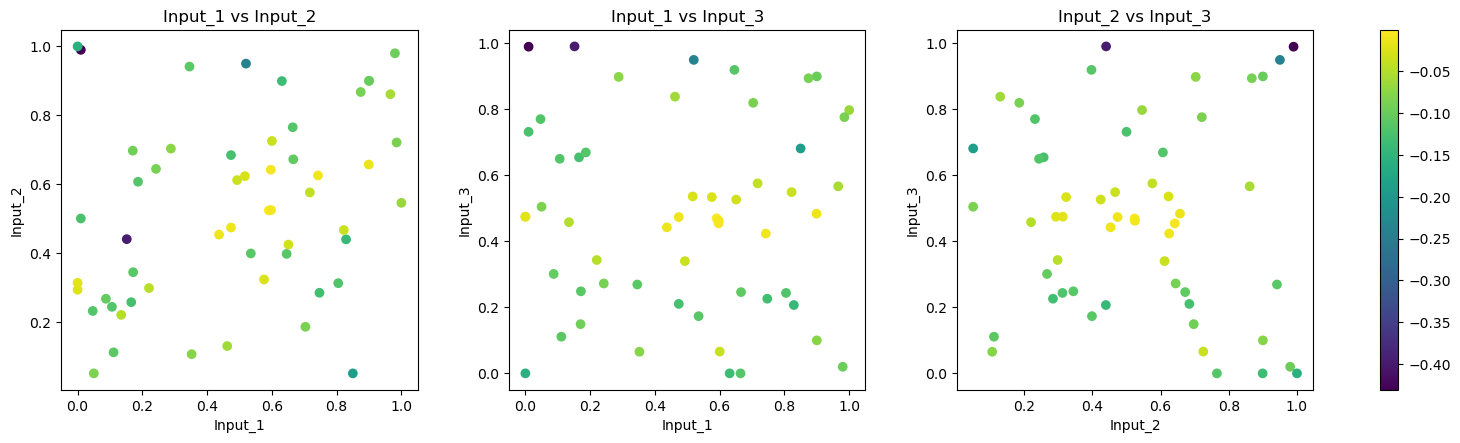

In [10]:
from itertools import combinations

# Calculate all pair combinations of input columns
input_columns = df.columns[df.columns.str.startswith('Input')]  # Select only columns that start with 'Input'
pair_combinations = list(combinations(input_columns, 2))  # Get all combinations of Input columns taken 2 at a time

# Determine the grid size for subplots
num_plots = len(pair_combinations)
num_cols = 3  # Set number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed, round up

# Create a figure with subplots in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))  # Adjust figure size as needed
fig.tight_layout(pad=4.0)  # Add spacing between plots

# Flatten axes array for easier iteration if it's 2D
axes = axes.flatten()

# Plotting each combination in the grid
for i, (x_col, y_col) in enumerate(pair_combinations):
    ax = axes[i]
    scatter = ax.scatter(df[x_col], df[y_col], c=df['Output'], cmap='viridis')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')

# Add a colorbar to the last plot
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=.02)

# Turn off axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

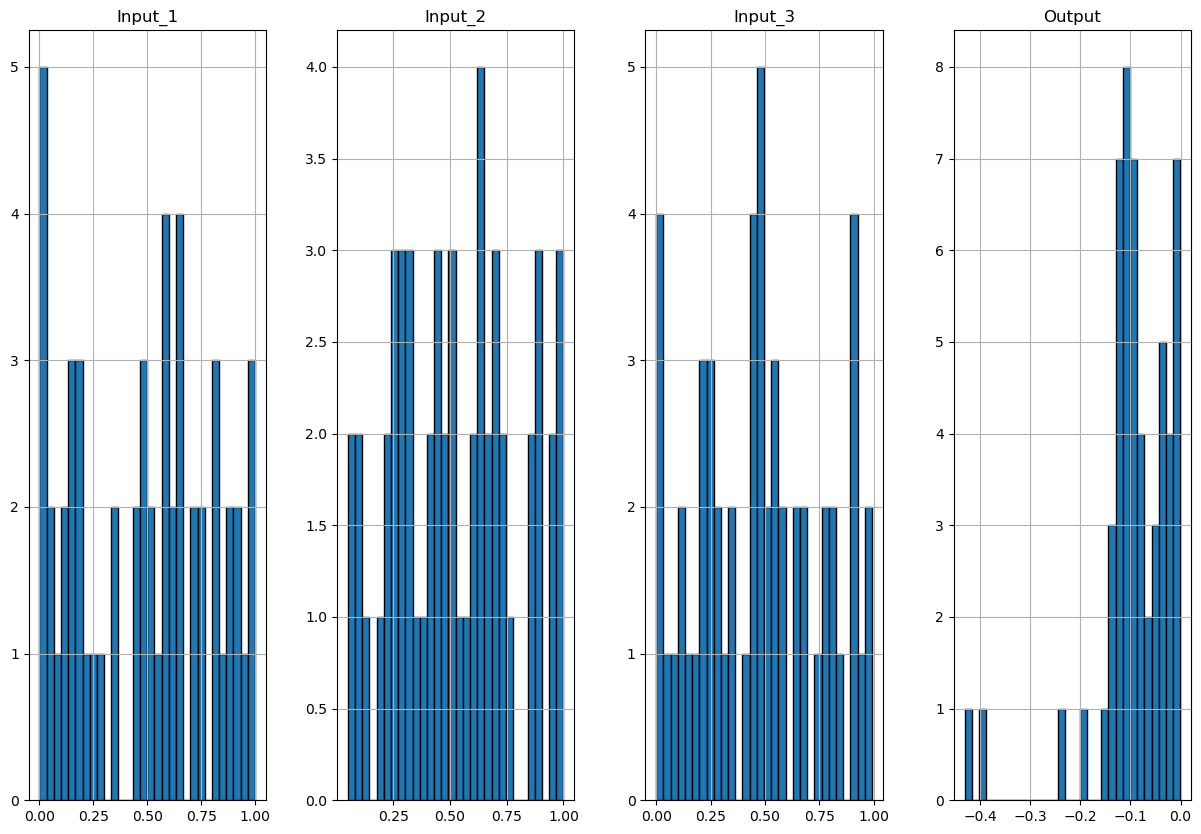

In [11]:
# Plot histograms for each column to understand distributions
df.hist(bins=30, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.5)
plt.show()

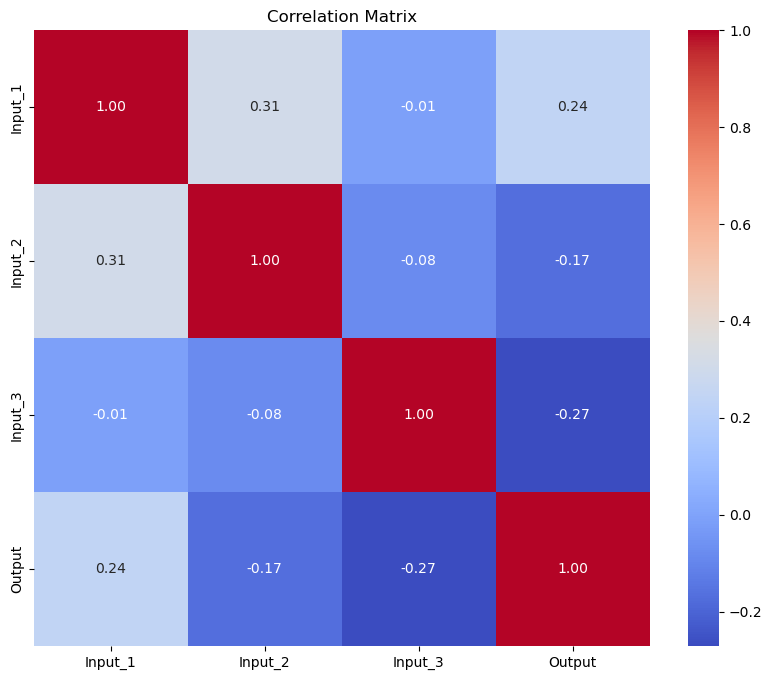

In [12]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

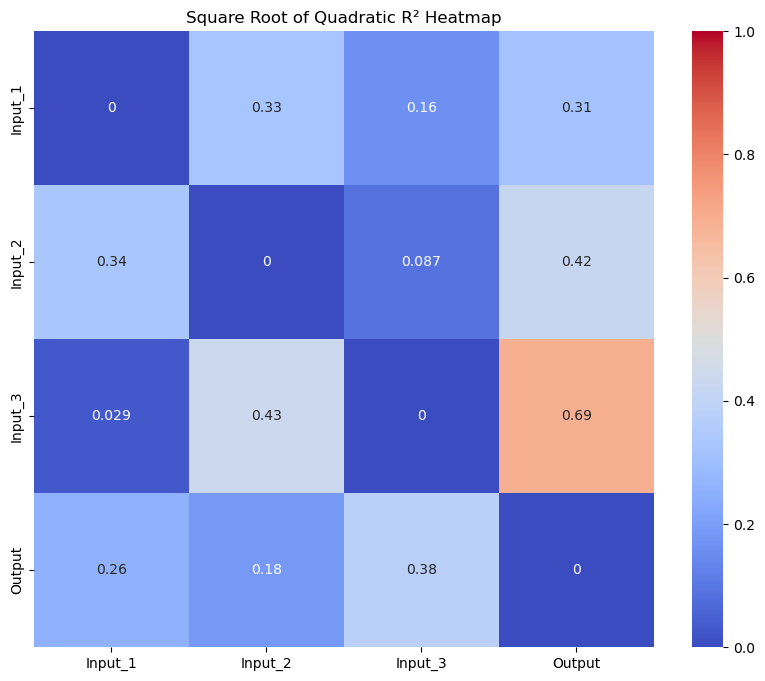

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def compute_quadratic_sqrt_r2(x, y):
    x = x[:, np.newaxis]
    polynomial_features = PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    
    return np.sqrt(r2_score(y, y_poly_pred))

def quadratic_sqrt_r2_matrix(data):
    cols = data.columns
    sqrt_r2_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
    
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:
                sqrt_r2_matrix.iloc[i, j] = compute_quadratic_sqrt_r2(data[cols[i]].values, data[cols[j]].values)
    
    return sqrt_r2_matrix

def plot_heatmap(sqrt_r2_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(sqrt_r2_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title('Square Root of Quadratic R² Heatmap')
    plt.show()


# Compute square root of R² matrix
sqrt_r2_matrix = quadratic_sqrt_r2_matrix(df)

# Plot heatmap
plot_heatmap(sqrt_r2_matrix)

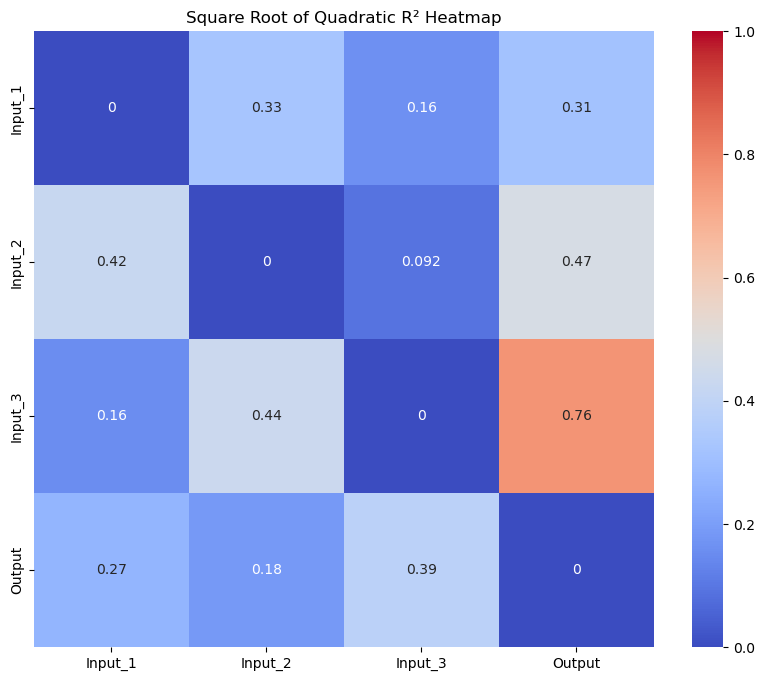

In [14]:
def compute_3rdGrade_sqrt_r2(x, y):
    x = x[:, np.newaxis]
    polynomial_features = PolynomialFeatures(degree=3)
    x_poly = polynomial_features.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    
    return np.sqrt(r2_score(y, y_poly_pred))

def quadratic_sqrt_r2_matrix(data):
    cols = data.columns
    sqrt_r2_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
    
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:
                sqrt_r2_matrix.iloc[i, j] = compute_3rdGrade_sqrt_r2(data[cols[i]].values, data[cols[j]].values)
    
    return sqrt_r2_matrix

def plot_heatmap(sqrt_r2_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(sqrt_r2_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title('Square Root of Quadratic R² Heatmap')
    plt.show()


# Compute square root of R² matrix
sqrt_r2_matrix = quadratic_sqrt_r2_matrix(df)

# Plot heatmap
plot_heatmap(sqrt_r2_matrix)

/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


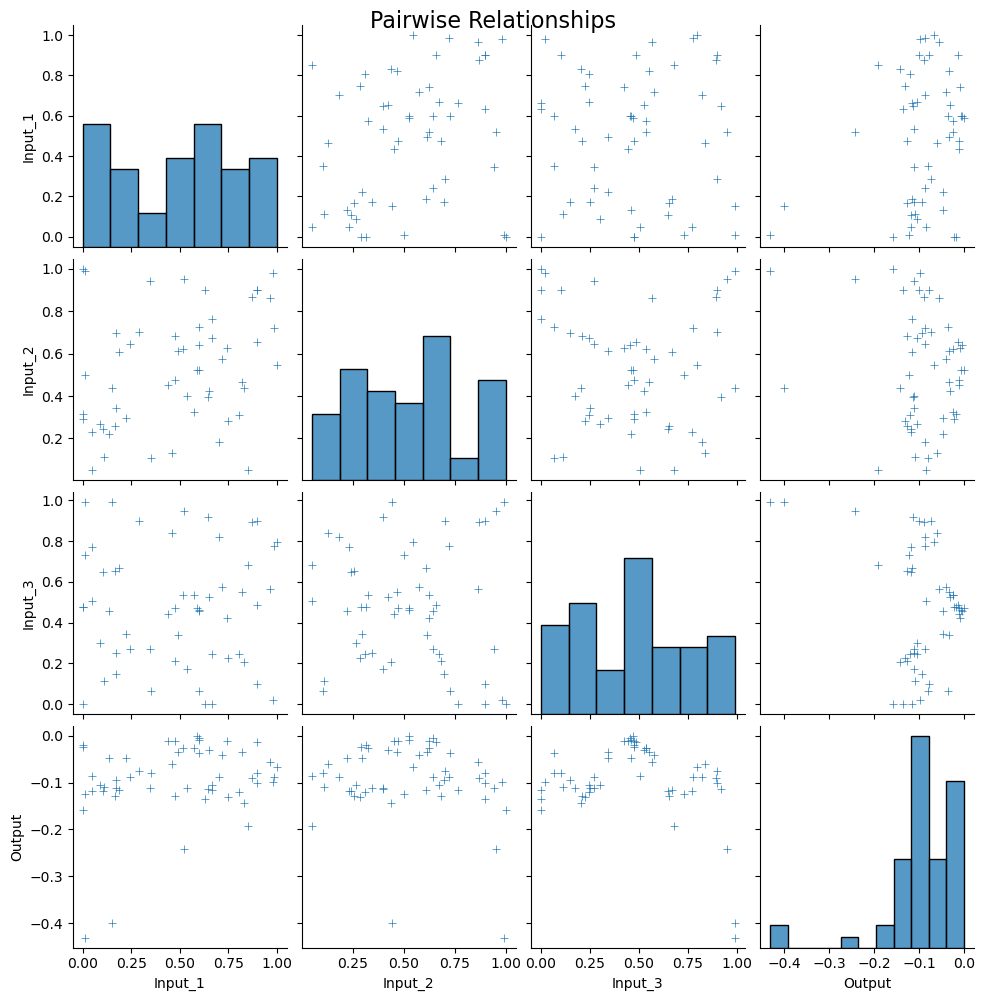

In [15]:
# Use pairplot to visualize the relationships between variables
sns.pairplot(df, kind='scatter', diag_kind='hist', markers='+')
plt.suptitle('Pairwise Relationships', verticalalignment='baseline', fontsize=16)
plt.show()

## Tracking of potential queries, submissions and historical notes


- Explorando los extremos

#### 4 May
Vamos a volver a submit el primero y voy a submit uno mas.
Pr si las dudas, voy a subir el original como segundo submit.
- [0.850000-0.050000-0.681579]
- [0.520000-0.950000-0.950000]

#### 10 may
Nos falta info a l mitad de Input 2 y nos faltan mas datos de Input 3 altos
Input 3 tiene alta correlacion. Los otros 2 hasta ahora no
Cuanto quito el mas negativo (drop index 6, el Input 1 muestra mas correlacion, el Input 2 parece irrelevante
Parece que input 1 y 3 en niveles bajos es bueno
- Beta 2.6 [0.900000-0.900000-0.100000]
- ONLY std [0.010000-0.500000-0.732105]
- Beta 2.6 [0.900000-0.900000-0.900000]

#### 14 May
- Beta casi CERO [0.371053-0.319474-0.474211]
- Beta 2.6 [0.010000-0.990000-0.680526] lengths .15
- [0.010000-0.990000-0.990000] length .3 (o lenght .15 sin el index 5)
- **** vamos por [0.010000-0.990000-0.990000] ---- pareciera que es exploratorio (Y fecvtivamente fue muy negativo)

#### 17 may
- Len .3, noise 1e-4
- Beta 1.96 [0.999999-0.000001-0.000001], Beta casi CERO [0.421053-0.421053-0.526316]
- len .2,
- Beta 1.96 [0.999999-0.000001-0.000001] Beta casi CERO [0.368421-0.421053-0.473684]
- len 0.1
- Beta 1.96 [0.421053-0.000001-0.999999], Beta casi CERO [0.368421-0.263158-0.421053]
- Log optim
- Beta 1.96 [0.999999-0.999999-0.000001], query EI: [0.000001-0.999999-0.999999], query PI: [0.052632-0.894736-0.999999]
- Aplique transformacion LOG al inicio y me da [0.473684-0.684210-0.210527]
****** Me voy por [0.980000-0.980000-0.020000] y [0.473684-0.684210-0.210527]

#### 1 Junio

**SIN AGREGAR DATOS COMPAÑERO
- Beta 1.96 [0.999999-0.000001-0.000001]
- Beta casi CERO [0.473684-0.578947-0.473684]

- CON DATOS compañero
- Beta 1.96 [0.999999-0.000001-0.000001]
- Beta casi CERO [0.578947-0.631579-0.526316]

- ESTANDARIZADO DATOS + LOG LIKELIHOOD
- Beta 1.96 [0.526316-0.526316-0.526316], Beta casi CERO [0.473684-0.473684-0.473684]
- Beta 1.96 [0.578947-0.578947-0.473684], Beta casi CERO [0.473684-0.526316-0.421053 (SIN LOG LIKELIHOOD)

- **** Voy por [0.473684-0.473684-0.473684]

#### 7 juni
- Log LIKE
Beta 1.96 [0.999999-0.545454-0.727272]
Beta casi CERO [0.717171-0.575757-0.575757] +
Beta 2.6 [0.999999-0.525252-0.757575]
query EI: [0.090910-0.838383-0.999999]
query PI: [0.050506-0.949494-0.999999]
max [0.742412,0.625096,0.423735

- +++++ ELIMINANDO DATOS COMPAÑERO [0.000001-0.292930-0.474748] ++

- VAMOS POR [0.000001-0.292930-0.474748] y [0.717171-0.575757-0.575757]

#### 12 jun

- log like normal
Beta 1.96 [0.999999-0.545454-0.797979] +
Beta casi CERO [0.707070-0.575757-0.565656]
Beta 2.6 [0.999999-0.505050-0.999999]

- log like sin datos compañero
Beta 1.96 [0.999999-0.515151-0.999999]
Beta casi CERO [0.000001-0.313132-0.474748] ++
Beta 2.6 [0.999999-0.505050-0.999999]

- *** Vamos por [0.000001-0.313132-0.474748]++ y [0.999999-0.545454-0.797979]+

#### 18 jun

Maximo compañero
+++df.loc[len(df)]=[0.436884,0.453066,0.442615,-0.004062]
+++df.loc[len(df)]=[0.742412,0.625096,0.423735,-0.0036179926]
Maximo ex-compañero
+++df.loc[len(df)]=[0.000001,0,292930,0.474748,-0.018309383]

- New model

- Con datos compañero
Next query point UCB with Beta 1.96: [0.000000-1.000000-0.000000]
Next query point UCB with Beta 0.01: [0.676768-0.545455-0.555556]
Next query point UCB with Beta 1.0: [0.686869-0.545455-0.565657]
Next query point EI: [0.050505-0.828283-1.000000]
Next query point PI: [0.050505-0.959596-1.000000]

- Sin datos compañero
Next query point UCB with Beta 1.96: [0.000000-0.000000-0.505051]++
Next query point UCB with Beta 0.01: [0.000000-0.333333-0.484848]
Next query point UCB with Beta 1.0: [0.000000-0.383838-0.474747]
Next query point EI: [0.050505-0.828283-1.000000]
Next query point PI: [0.050505-0.959596-1.000000]

- ** Vamos por [0.050000-0.050000-0.505051]

#### 22 jun

- con datos compañero
Next query point UCB with Beta 1.96: [0.000001-0.999999-0.000001]
Next query point UCB with Beta 0.01: [0.646464-0.535353-0.555555]
Next query point UCB with Beta 1.0: [0.000001-0.414142-0.474748]
Next query point UCB with Beta 2.6: [0.000001-0.999999-0.000001]

- Sin datos compañero
Next query point UCB with Beta 1.96: [0.000001-0.999999-0.000001]++
Next query point UCB with Beta 0.01: [0.000001-0.383839-0.484849]
Next query point UCB with Beta 1.0: [0.000001-0.414142-0.474748]
Next query point UCB with Beta 2.6: [0.000001-0.999999-0.000001]

- ** Vamos por [0.000001-0.999999-0.000001]

#### 24 jun

- con datos compañero
Next query point UCB with Beta 1.96: [0.617449-0.899328-0.000001]
Next query point UCB with Beta 0.01: [0.395973-0.409396-0.369128]
Next query point UCB with Beta 1.0: [0.429530-0.342282-0.375839]

- Sin datos compañero
Next query point UCB with Beta 1.96: [0.630872-0.899328-0.000001]++
Next query point UCB with Beta 0.01: [0.664429-0.765100-0.000001]**
Next query point UCB with Beta 1.0: [0.677852-0.825503-0.000001]

- ** Vamos por [0.630872-0.899328-0.000001] y [0.664429-0.765100-0.000001] (malos ambos)

#### 28 jun
        necesito explorar mas en datos compañero
        df.loc[len(df)]=[0.436884,0.453066,0.442615,-0.004062]
        df.loc[len(df)]=[0.436884,0.453066,0.442615,-0.010063]
        df.loc[len(df)]=[0.436884,0.453066,0.442615,-0.016063]
        df.loc[len(df)]=[0.742412,0.625096,0.423735,-0.0036179926]

    -con datos cpñ
    Next query point UCB with Beta 1.96: [0.496644-0.671141-0.503356]
    Next query point UCB with Beta 0.01: [0.496644-0.570470-0.416108]
    Next query point UCB with Beta 1.0: [0.516778-0.630872-0.476510]
    Next query point UCB with Beta 2.6: [0.483222-0.691275-0.516778]

    -sin datos copñ
    Next query point UCB with Beta 1.96: [0.422819-0.281880-0.395973]
    Next query point UCB with Beta 0.01: [0.382551-0.429530-0.375839]
    Next query point UCB with Beta 1.0: [0.409396-0.335571-0.389262]
    Next query point UCB with Beta 2.6: [0.436242-0.248323-0.389262]

    - !!!CON TODOS LOS DATOS y datos cpñ
        -sin model noise
        Next query point UCB with Beta 0.01: [0.530201-0.543624-0.416108]
        Next query point UCB with Beta 1.0: [0.610738-0.536913-0.416108]
        Next query point UCB with Beta 1.96: [0.939596-0.657718-0.483222]
        Next query point UCB with Beta 2.6: [0.973153-0.651006-0.469799]
        -con modelo noise
        Next query point UCB with Beta 0.01: [0.536913-0.476510-0.469799]
        Next query point UCB with Beta 1: [0.590604-0.523490-0.463087]
        Next query point UCB with Beta 1.96: [0.543624-0.597315-0.516779]
        Next query point UCB with Beta 2.6: [0.516779-0.637584-0.543624]

    - !!!CON TODOS LOS DATOS sin datos cpñ
        -sin modelo noise
        Next query point UCB with Beta 0.01: [0.570470-0.456376-0.503356]
        Next query point UCB with Beta 1: [0.570470-0.503356-0.496644]
        Next query point UCB with Beta 1.96: [0.516779-0.557047-0.583893]
        Next query point UCB with Beta 2.6: [0.496644-0.617450-0.583893]
        -con modelo noise
        Next query point UCB with Beta 0.01: [0.474748-0.545454-0.414142]
        Next query point UCB with Beta 1.0: [0.484849-0.616161-0.464647]
        Next query point UCB with Beta 1.96: [0.464647-0.656565-0.494950]
        Next query point UCB with Beta 2.6: [0.464647-0.686868-0.515151]

- VAMOS A METER TAL CUAL DATOS CPñ PARA TENER VARIAS ITERACIONES

- ** Vamos por [0.436884-0.453066-0.442615] y [0.742412-0.625096-0.423735] 

#### 1 julio

With AVERAGE model
Next query point UCB with Beta 0.01: [0.496644-0.543624-0.409396]
Next query point UCB with Beta 1.0: [0.583892-0.637584-0.463087]
Next query point UCB with Beta 1.96: [0.946308-0.657718-0.469799]

ALL data
Next query point UCB with Beta 0.01: [0.525252-0.545454-0.414142]
Next query point UCB with Beta 1.0: [0.606060-0.535353-0.414142]
Next query point UCB with Beta 1.96: [0.939393-0.656565-0.484849]

Noise model
Next query point UCB with Beta 0.01: [0.543624-0.476510-0.476510]
Next query point UCB with Beta 1: [0.590604-0.523490-0.469799]      ++  ** max
Next query point UCB with Beta 1.96: [0.543624-0.597315-0.523490]

- ** Vampos por [0.590604-0.523490-0.469799]

#### 6 julio

AVERAGE Model
Next query point UCB with Beta 0.01: [0.543624-0.566779-0.428792]
Next query point UCB with Beta 1.0: [0.550335-0.651342-0.474094]
Next query point UCB with Beta 1.96: [0.530201-0.711744-0.507651]
ALL data
Next query point UCB with Beta 0.01: [0.554622-0.563446-0.429328]
Next query point UCB with Beta 1.0: [0.563025-0.641596-0.465042]
Next query point UCB with Beta 1.96: [0.537815-0.704621-0.496555]
Noise model
Next query point UCB with Beta 0.01: [0.570470-0.500336-0.472416]
Next query point UCB with Beta 1: [0.597315-0.524497-0.462349] 
Next query point UCB with Beta 1.96: [0.516778-0.623154-0.536174] ++

- Vamos por [0.516778-0.623154-0.536174]

#### 9 julio

AVERAGE model
Next query point UCB with Beta 0.01: [0.530201-0.566779-0.430470]
Next query point UCB with Beta 1.0: [0.906039-0.643288-0.479128]
Next query point UCB with Beta 1.96: [0.986576-0.641275-0.462349]

ALL data
Next query point UCB with Beta 0.01: [0.546218-0.571009-0.435631]
Next query point UCB with Beta 1.0: [0.596638-0.623949-0.448236]
Next query point UCB with Beta 1.96: [0.974789-0.641596-0.477647]

Noise model
Next query point UCB with Beta 0.01: [0.570470-0.516444-0.479128]
Next query point UCB with Beta 1: [0.597315-0.524497-0.462349]  ++
Next query point UCB with Beta 1.96: [0.503356-0.472149-0.609999]

- ** Vamos por [0.597315-0.524497-0.462349]

#### 13 jul

AVERAGE model
Next query point UCB with Beta 0.01: [0.510067-0.576846-0.438859]
Next query point UCB with Beta 1.0: [0.912751-0.655369-0.465705]
Next query point UCB with Beta 1.96: [0.979865-0.647315-0.452282]

ALL Data
Next query point UCB with Beta 0.01: [0.529412-0.581093-0.441933]
Next query point UCB with Beta 1.0: [0.596638-0.641596-0.454538] ++
Next query point UCB with Beta 1.96: [0.974789-0.646638-0.469244]

Noise model
Next query point UCB with Beta 0.01: [0.563758-0.520470-0.477450]
Next query point UCB with Beta 1: [0.543624-0.510403-0.522751]
Next query point UCB with Beta 1.96: [0.503356-0.476175-0.609999]

- ** Vamos por [0.596638-0.641596-0.454538]

#### 15 jul

AVERAGE model
Next query point UCB with Beta 0.01: [0.510067-0.564765-0.432148]
Next query point UCB with Beta 1.0: [0.919462-0.655369-0.472416]
Next query point UCB with Beta 1.96: [0.999999-0.641275-0.455638]

ALL Data
Next query point UCB with Beta 0.01: [0.521008-0.565967-0.433530]
Next query point UCB with Beta 1.0: [0.899159-0.656722-0.483950] ++
Next query point UCB with Beta 1.96: [0.991596-0.641596-0.473445]

Noise model
Next query point UCB with Beta 0.01: [0.577181-0.538591-0.472416]
Next query point UCB with Beta 1: [0.597315-0.532551-0.457316]
Next query point UCB with Beta 1.96: [0.503356-0.472149-0.609999]

- ** Vamos por [0.899159-0.656722-0.483950]

- #### 20 jul

AVERAGE model
Next query point UCB with Beta 0.01: [0.496644-0.564765-0.432148]
Next query point UCB with Beta 1.0: [0.429530-0.572819-0.433826]
Next query point UCB with Beta 1.96: [0.000001-0.558725-0.428792]
Next query point UCB with Beta 2.6: [0.000001-0.588926-0.418725]

ALL data
Next query point UCB with Beta 0.01: [0.504202-0.565967-0.435631]
Next query point UCB with Beta 1.0: [0.436975-0.571009-0.433530]
Next query point UCB with Beta 1.96: [0.999999-0.749999-0.360001]
Next query point UCB with Beta 2.6: [0.000001-0.586135-0.420925]

Noise model
Next query point UCB with Beta 0.01: [0.570470-0.536578-0.472416]
Next query point UCB with Beta 1: [0.577181-0.530537-0.467383] ++
Next query point UCB with Beta 1.96: [0.731543-0.749999-0.524429]
Next query point UCB with Beta 2.6: [0.724832-0.749999-0.551275]

- ** Vampos por [0.577181-0.530537-0.467383]

# New model

In [29]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning
from itertools import combinations

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df.drop(columns=['Output'])
y = df[['Output']]

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 1, name='length_scale'),
    Real(1e-15, 1e-2, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

#****
# Define custom ranges for each input
# Modify these ranges as needed
input_ranges = [
    (0.000001, 0.999999),  # Range for Input_1
    (0.450001, 0.749999),  # Range for Input_2
    (0.360001, 0.609999)   # Range for Input_3
    # Add more ranges for additional inputs if necessary
]

# Ensure the number of ranges matches the number of inputs
if len(input_ranges) != X.shape[1]:
    raise ValueError("The number of input ranges must match the number of inputs.")

#****   
    
GG = 150  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)

# Convert to DataFrame with appropriate column names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
# Scale the grid points
X_grid_scaled = scaler_X.transform(X_grid_df)

# Predictions using the surrogate model
mean_scaled, std_scaled = GPR_model_best.predict(X_grid_scaled, return_std=True)
mean_scaled = mean_scaled.reshape(-1, 1)  # Reshape to 2D array
mean = scaler_y.inverse_transform(mean_scaled).flatten()  # Inverse transform to original scale and flatten to 1D array
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 0.01
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Calculate and collect query points
query_points = [
    (next_query_ucb, 'UCB Beta 0.01', 'red', 'o')
]

# Test different beta values for UCB and other acquisition functions
for beta, color, marker in zip([1.00,1.96,2.6], ['blue', 'green', 'purple'], ['x', 's', 'd']):
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    query_points.append((next_query, f'UCB Beta {beta}', color, marker))
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")



Best length scale: 0.8832840456635547
Best noise level: 1e-15
Next query point UCB with Beta 0.01: [0.496644-0.564765-0.432148]
Next query point UCB with Beta 1.0: [0.429530-0.572819-0.433826]
Next query point UCB with Beta 1.96: [0.000001-0.558725-0.428792]
Next query point UCB with Beta 2.6: [0.000001-0.588926-0.418725]


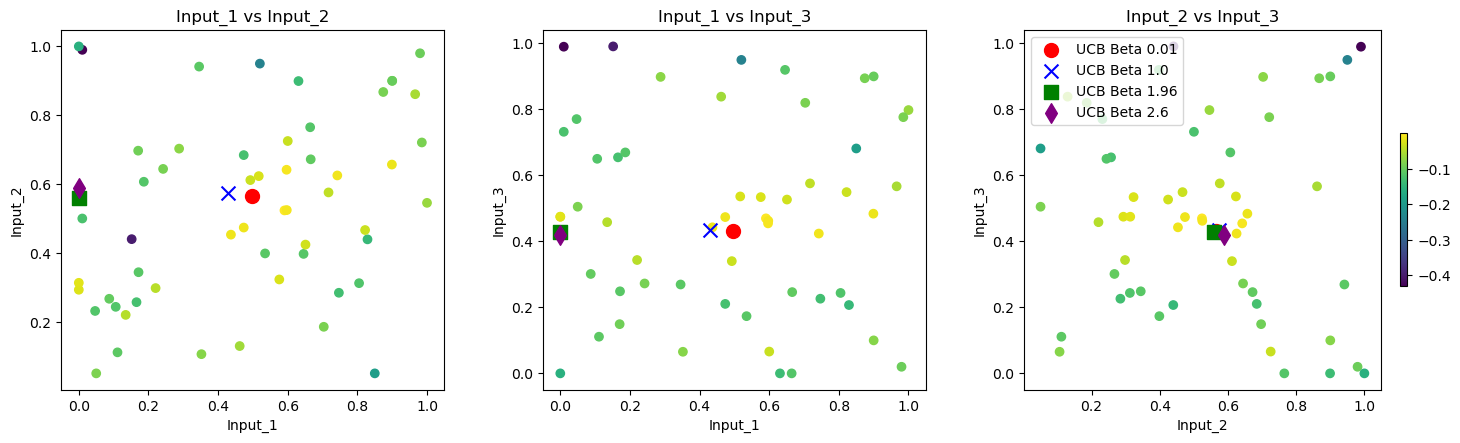

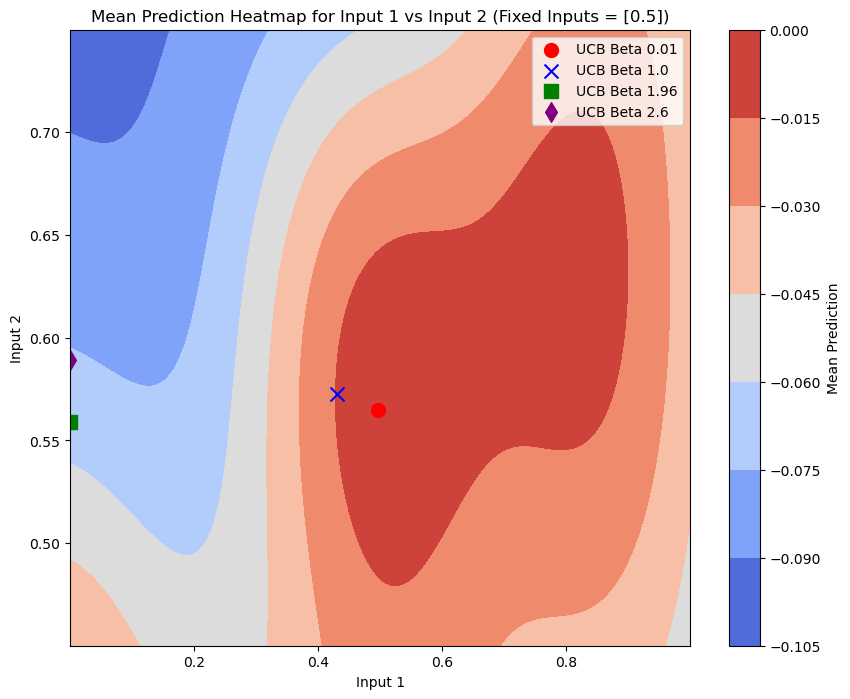

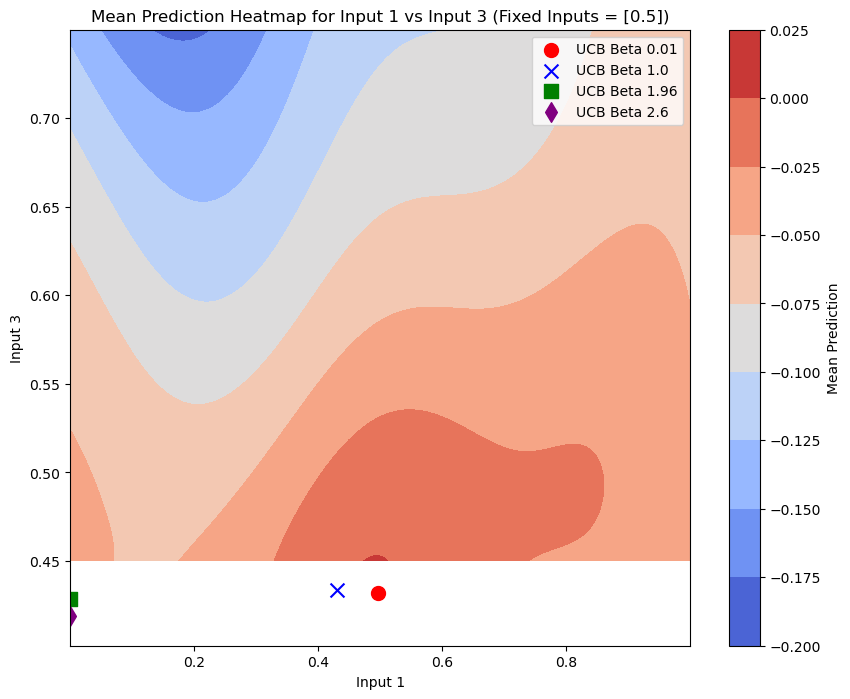

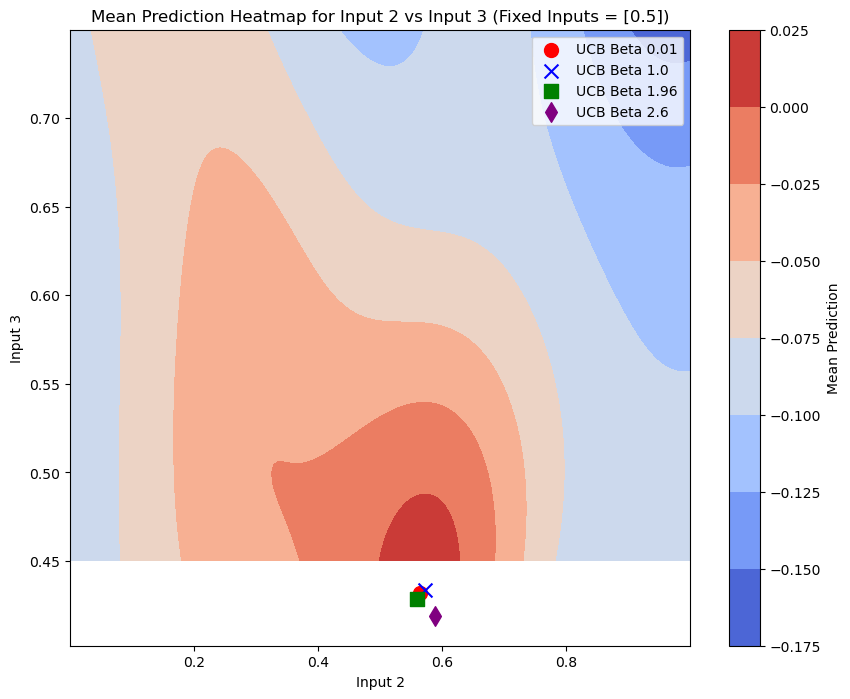

In [30]:
# Visualization function to include pairwise scatter plots and heatmaps
def visualize_data(X_original, y_original, X_grid, query_points, input_ranges):
    num_inputs = X_original.shape[1]
    
    # Pairwise scatter plots with color gradient and query points
    if num_inputs > 1:
        input_columns = X_original.columns
        pair_combinations = list(combinations(input_columns, 2))
        num_plots = len(pair_combinations)
        num_cols = 3
        num_rows = (num_plots + num_cols - 1) // num_cols

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
        fig.tight_layout(pad=4.0)
        axes = axes.flatten()

        for i, (x_col, y_col) in enumerate(pair_combinations):
            ax = axes[i]
            scatter = ax.scatter(X_original[x_col], X_original[y_col], c=y_original.values.flatten(), cmap='viridis')
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title(f'{x_col} vs {y_col}')
            
            for query, label, color, marker in query_points:
                ax.scatter(query[input_columns.get_loc(x_col)], query[input_columns.get_loc(y_col)], color=color, marker=marker, s=100, label=label)
            
            if i == num_plots - 1:
                fig.colorbar(scatter, ax=ax, orientation='vertical', fraction=.02)
        
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.legend()
        plt.show()

    # Generate heatmaps for all pairs of inputs
    for (i, j) in combinations(range(num_inputs), 2):
        fixed_input_values = [0.5] * (num_inputs - 2)
        fixed_indices = [k for k in range(num_inputs) if k != i and k != j]

        X_grid_fixed = generate_grid(input_ranges[:2], GG)
        X_grid_fixed_full = np.zeros((X_grid_fixed.shape[0], num_inputs))
        X_grid_fixed_full[:, [i, j]] = X_grid_fixed
        for idx, fixed_val in zip(fixed_indices, fixed_input_values):
            X_grid_fixed_full[:, idx] = fixed_val

        X_grid_fixed_full_df = pd.DataFrame(X_grid_fixed_full, columns=X_original.columns)
        X_grid_fixed_scaled = scaler_X.transform(X_grid_fixed_full_df)
        mean_fixed_scaled, std_fixed_scaled = GPR_model_best.predict(X_grid_fixed_scaled, return_std=True)
        mean_fixed = scaler_y.inverse_transform(mean_fixed_scaled.reshape(-1, 1)).flatten()

        plt.figure(figsize=(10, 8))
        plt.contourf(X_grid_fixed[:, 0].reshape(GG, GG), X_grid_fixed[:, 1].reshape(GG, GG), mean_fixed.reshape(GG, GG), cmap='coolwarm')
        plt.colorbar(label='Mean Prediction')
        
        for query, label, color, marker in query_points:
            plt.scatter(query[i], query[j], color=color, marker=marker, s=100, label=label)

        plt.title(f'Mean Prediction Heatmap for Input {i+1} vs Input {j+1} (Fixed Inputs = {fixed_input_values})')
        plt.xlabel(f'Input {i+1}')
        plt.ylabel(f'Input {j+1}')
        plt.legend()
        plt.show()

# Call the visualization function using the original data
visualize_data(X, y, X_grid, query_points, input_ranges)